In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
uv_data = pd.read_csv("TrainData.csv") 

## Data Exploration

In [4]:
uv_data.head()

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
0,1,03-04-2016 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000,7,petrol,subaru,No,03-04-2016 00:00,0,34474,07-04-2016 13:15
1,2,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000,5,diesel,volkswagen,No,08-03-2016 00:00,0,50765,11-03-2016 17:15
2,3,26-03-2016 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000,2,diesel,mercedes_benz,No,26-03-2016 00:00,0,90475,26-03-2016 17:38
3,4,11-03-2016 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000,9,diesel,alfa_romeo,No,11-03-2016 00:00,0,40699,12-03-2016 02:45
4,5,17-03-2016 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000,3,petrol,audi,No,17-03-2016 00:00,0,84347,07-04-2016 04:17


In [5]:
uv_data.dtypes

VehicleID                      int64
DataCollectedDate             object
NameOfTheVehicle              object
SellerType                    object
OfferType                     object
Price                          int64
VehicleType                   object
YearOfVehicleRegistration      int64
GearBoxType                   object
PowerOfTheEngine               int64
ModelOfTheVehicle             object
DistranceTravelled             int64
MonthOfVehicleRegistration     int64
TypeOfTheFuelUsed             object
BrandOfTheVehicle             object
IsDamageRepaired              object
DateOfAdCreation              object
NumberOfPictures               int64
ZipCode                        int64
DateOfAdLastSeen              object
dtype: object

In [6]:
uv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 20 columns):
VehicleID                     58857 non-null int64
DataCollectedDate             58857 non-null object
NameOfTheVehicle              58857 non-null object
SellerType                    58857 non-null object
OfferType                     58857 non-null object
Price                         58857 non-null int64
VehicleType                   57013 non-null object
YearOfVehicleRegistration     58857 non-null int64
GearBoxType                   57138 non-null object
PowerOfTheEngine              58857 non-null int64
ModelOfTheVehicle             58857 non-null object
DistranceTravelled            58857 non-null int64
MonthOfVehicleRegistration    58857 non-null int64
TypeOfTheFuelUsed             56772 non-null object
BrandOfTheVehicle             58857 non-null object
IsDamageRepaired              52008 non-null object
DateOfAdCreation              58857 non-null object
NumberOfPictu

In [7]:
uv_data.shape

(58857, 20)

In [8]:
uv_data_test.shape

(19594, 19)

In [9]:
## Converting ZipCode and VehicleID to categorical

In [10]:
uv_data[['VehicleID','ZipCode']] = uv_data[['VehicleID','ZipCode']].astype('str').astype("category")

In [11]:
uv_data.VehicleID.unique()

[1, 2, 3, 4, 5, ..., 58853, 58854, 58855, 58856, 58857]
Length: 58857
Categories (58857, object): [1, 2, 3, 4, ..., 58854, 58855, 58856, 58857]

In [12]:
numeric_features = uv_data.select_dtypes(include=[np.number])

In [13]:
numeric_features.columns

Index(['Price', 'YearOfVehicleRegistration', 'PowerOfTheEngine',
       'DistranceTravelled', 'MonthOfVehicleRegistration', 'NumberOfPictures'],
      dtype='object')

In [14]:
categorical_features = uv_data.select_dtypes(include=[np.object])

In [15]:
categorical_features.columns

Index(['DataCollectedDate', 'NameOfTheVehicle', 'SellerType', 'OfferType',
       'VehicleType', 'GearBoxType', 'ModelOfTheVehicle', 'TypeOfTheFuelUsed',
       'BrandOfTheVehicle', 'IsDamageRepaired', 'DateOfAdCreation',
       'DateOfAdLastSeen'],
      dtype='object')

## Checking Nullity Correlation

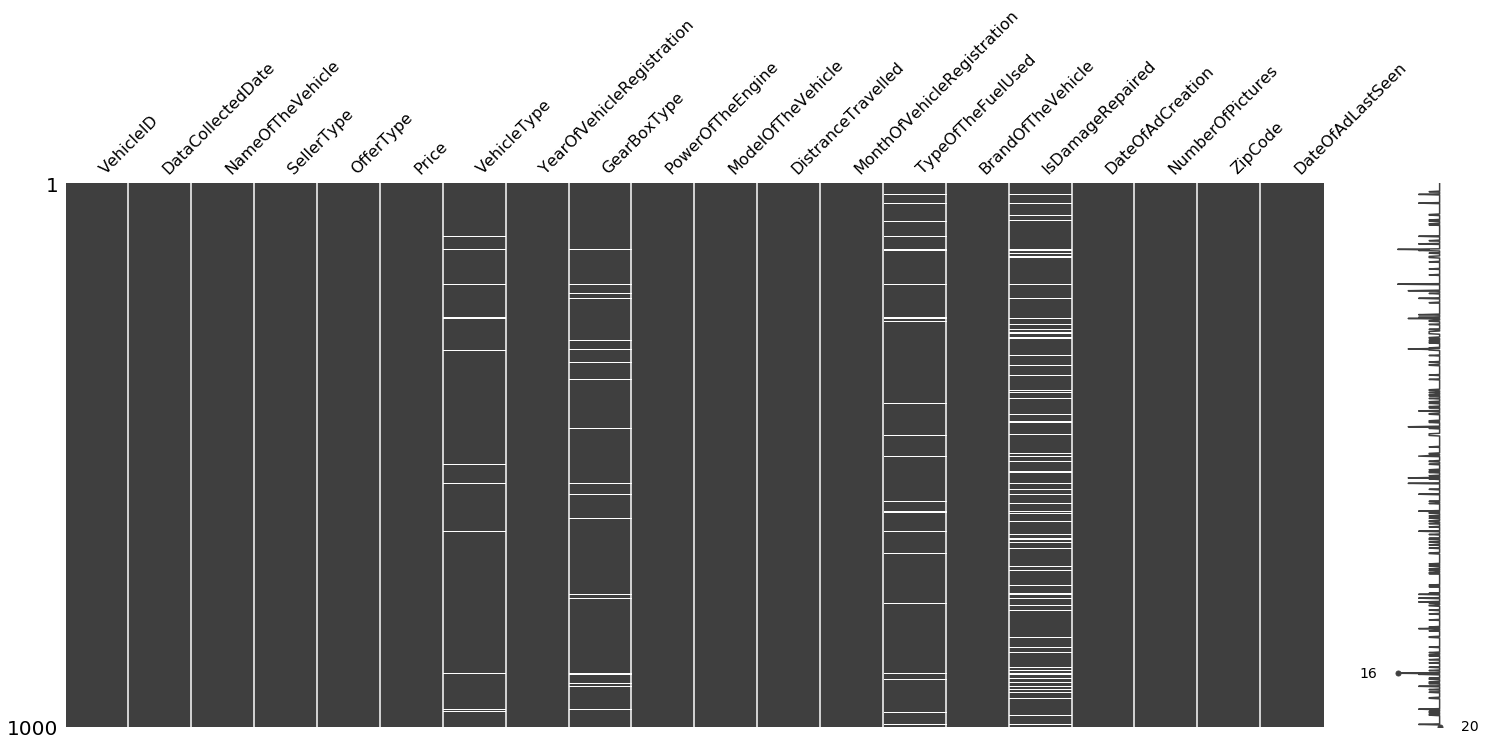

In [16]:
msno.matrix(uv_data.sample(1000))

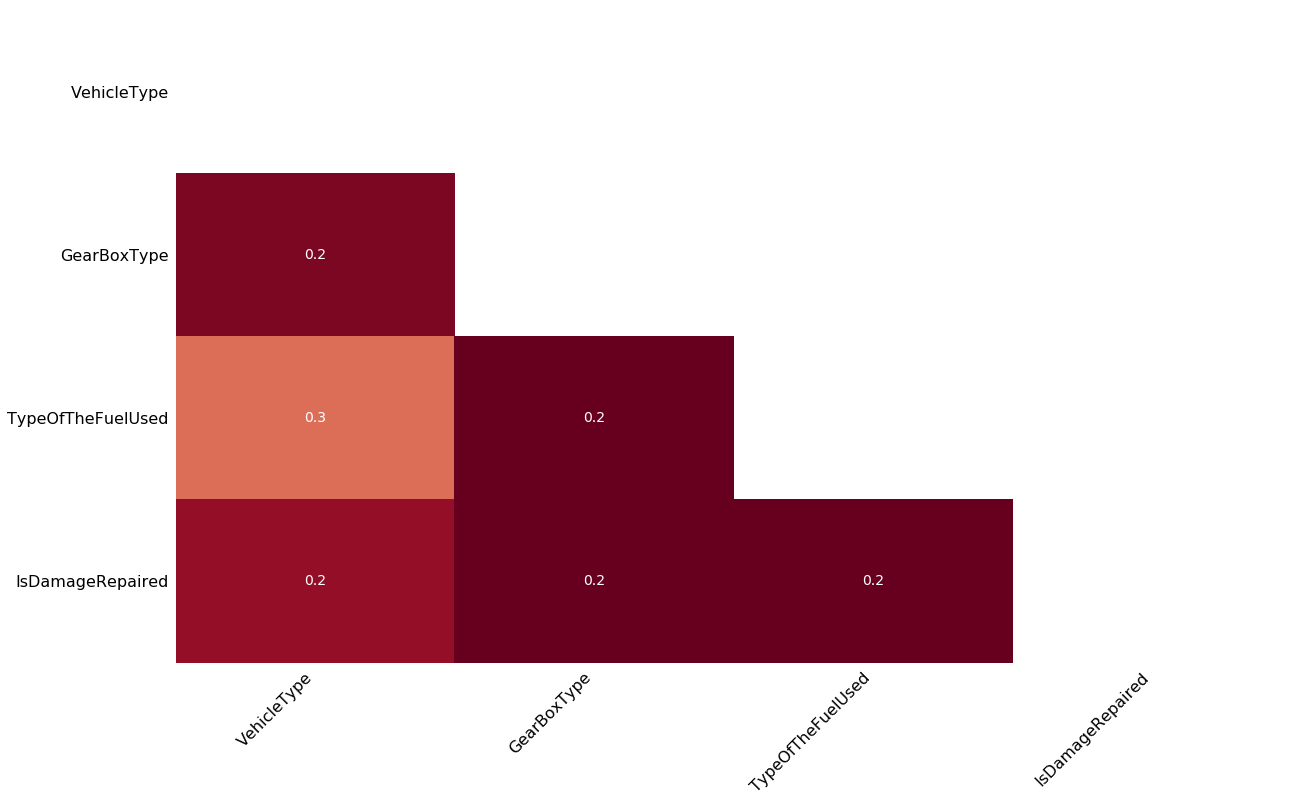

In [17]:
msno.heatmap(uv_data)

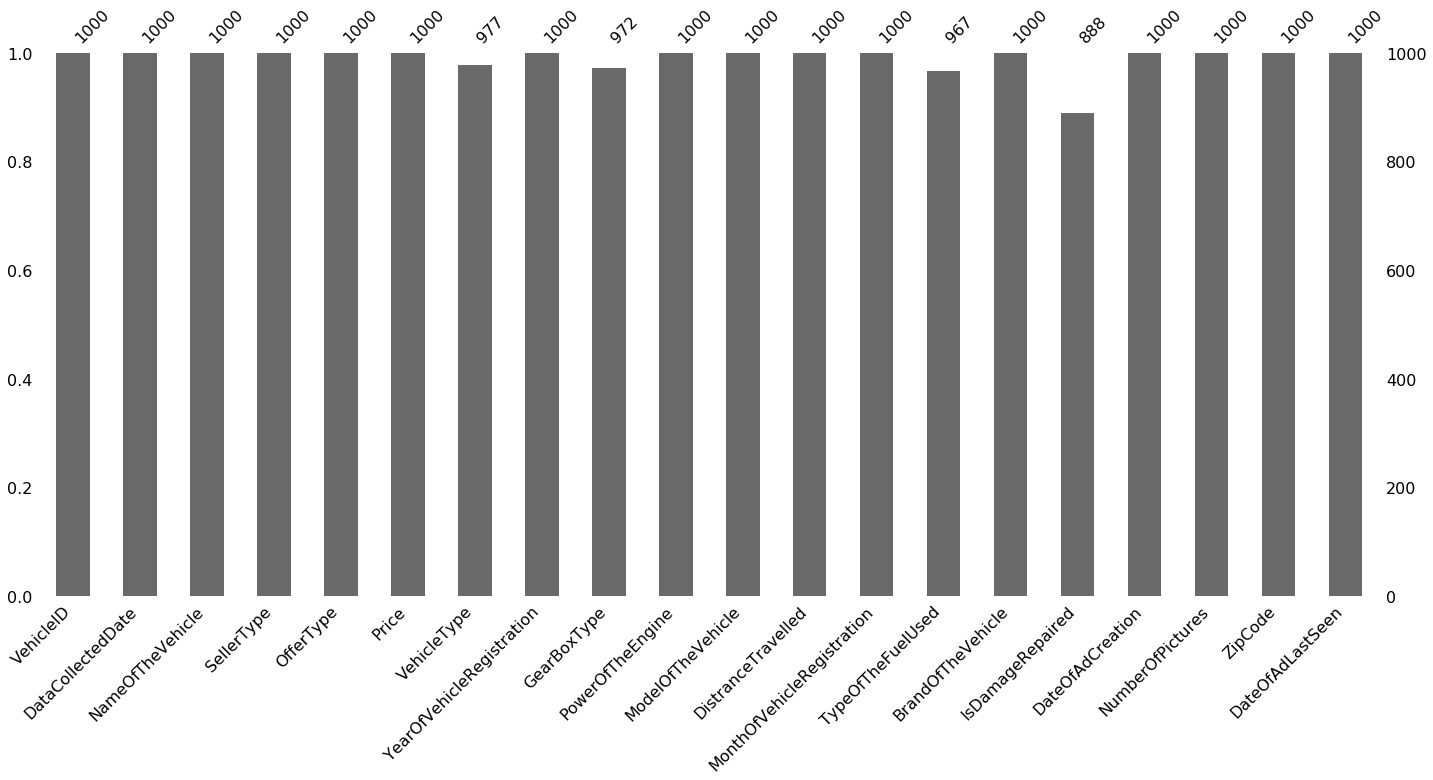

In [18]:
msno.bar(uv_data.sample(1000))

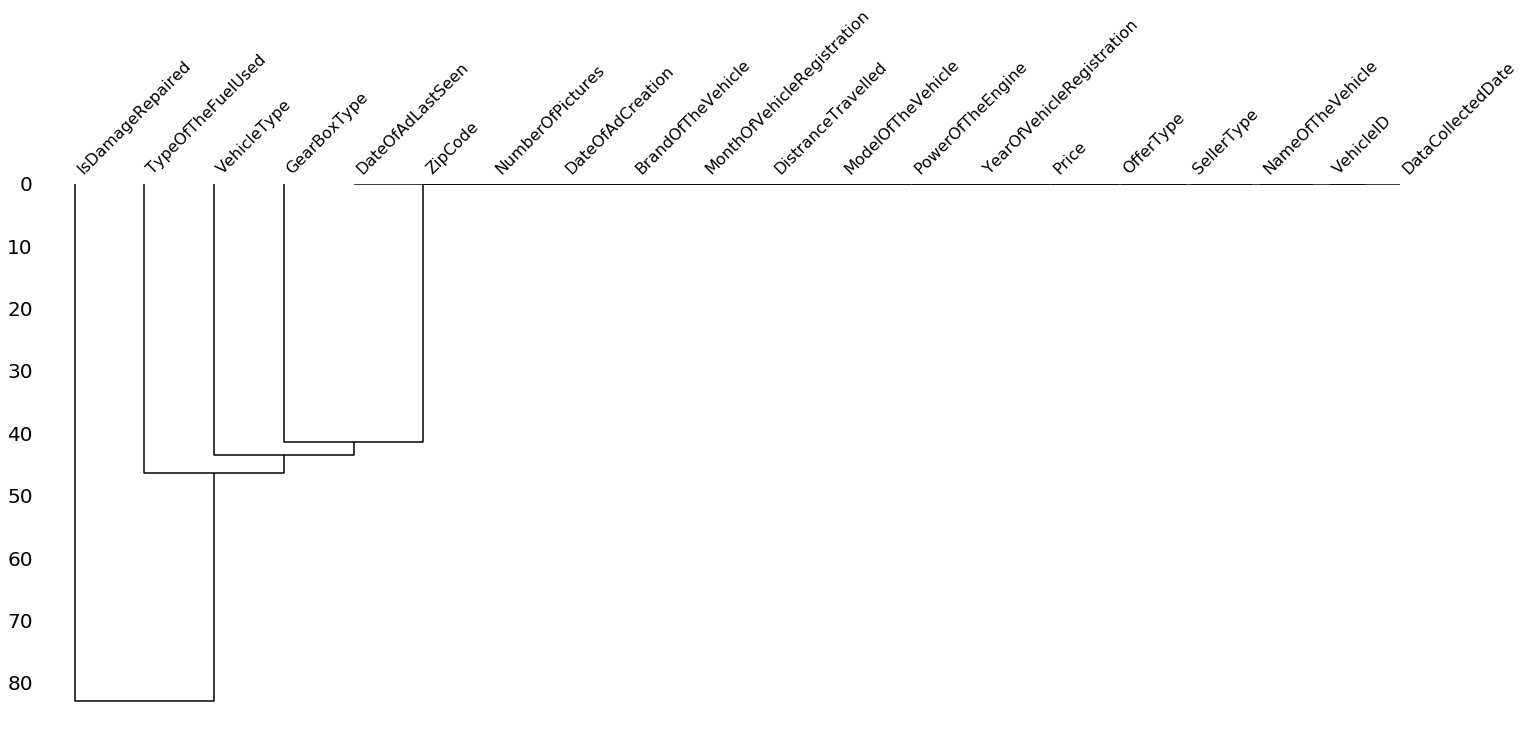

In [19]:
msno.dendrogram(uv_data)

In [20]:
## Checking for skew in the data
uv_data.skew()

VehicleID                      0.000000
Price                          1.741881
YearOfVehicleRegistration      0.354689
PowerOfTheEngine              71.044310
DistranceTravelled            -1.137733
MonthOfVehicleRegistration     0.097128
NumberOfPictures               0.000000
ZipCode                        0.006566
dtype: float64

In [21]:
## Checkint the Kurtosis
uv_data.kurt()

VehicleID                       -1.200000
Price                            3.239900
YearOfVehicleRegistration       -0.636849
PowerOfTheEngine              6427.275619
DistranceTravelled               0.004192
MonthOfVehicleRegistration      -1.195391
NumberOfPictures                 0.000000
ZipCode                         -0.982140
dtype: float64

In [22]:
import scipy.stats as st

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


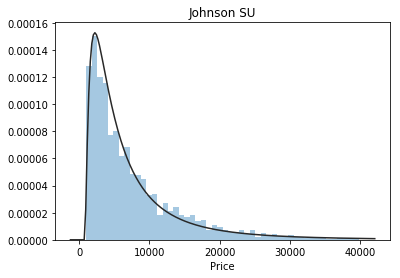

In [23]:
y = uv_data['Price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


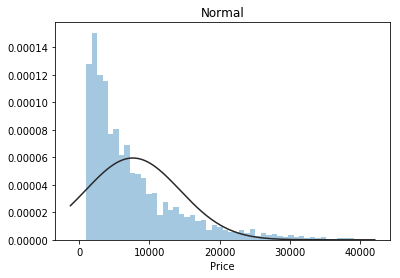

In [24]:
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


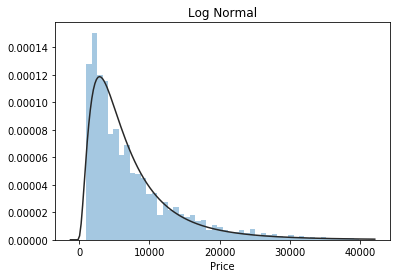

In [25]:
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [26]:
## Its clear that the target variable does not follow the normal distribution 
## therefore before performing regression it has to be transformed 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


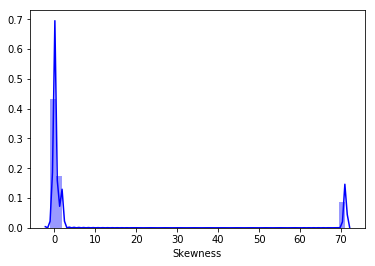

In [27]:
sns.distplot(uv_data.skew(),color='blue',axlabel ='Skewness')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


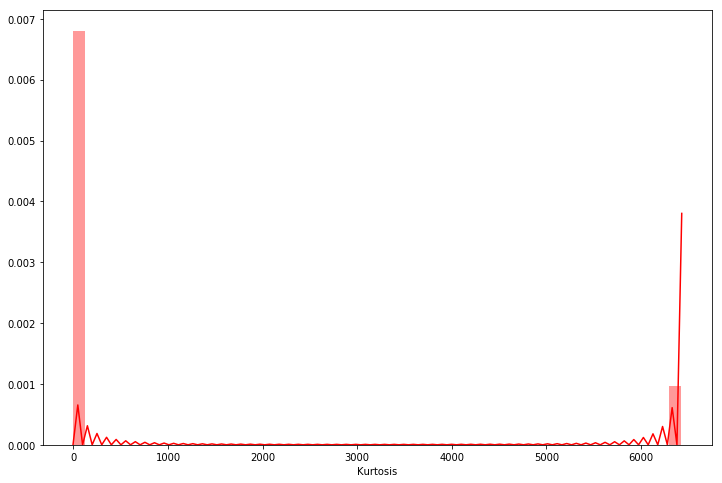

In [28]:
plt.figure(figsize = (12,8))
sns.distplot(uv_data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
             

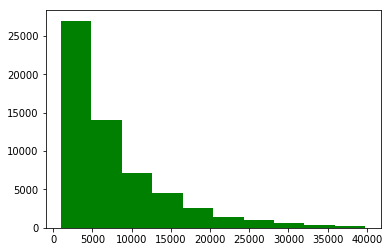

In [29]:
plt.hist(uv_data['Price'],orientation = 'vertical',histtype
= 'bar', color ='green')
plt.show()

In [30]:
## Transforming the target variable
target = np.log(uv_data['Price'])

In [31]:
target.skew()

0.10480662751565557

(array([2792., 5916., 7971., 7865., 8731., 8905., 6830., 5602., 3006.,
        1239.]),
 array([ 6.90875478,  7.27704152,  7.64532826,  8.013615  ,  8.38190174,
         8.75018849,  9.11847523,  9.48676197,  9.85504871, 10.22333545,
        10.59162219]),
 <a list of 10 Patch objects>)

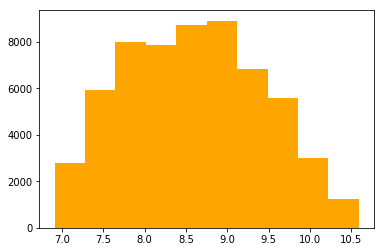

In [32]:
## Plot for the transformed target variable
plt.hist(target,color='orange')

In [33]:
correlation = numeric_features.corr()

In [34]:
print(correlation['Price'].sort_values(ascending=False))

Price                         1.000000
YearOfVehicleRegistration     0.602540
PowerOfTheEngine              0.198645
MonthOfVehicleRegistration    0.026637
DistranceTravelled           -0.440275
NumberOfPictures                   NaN
Name: Price, dtype: float64


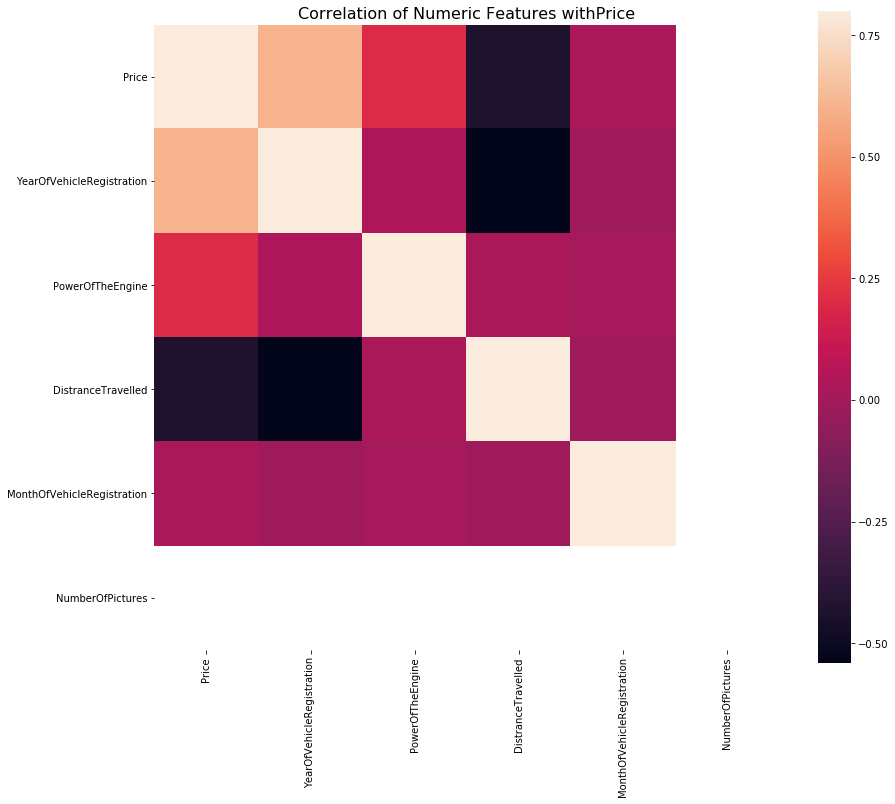

In [35]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features withPrice',y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)

In [36]:
## Observing Correlation of All factors to Price

Index(['Price', 'YearOfVehicleRegistration', 'PowerOfTheEngine',
       'MonthOfVehicleRegistration', 'DistranceTravelled'],
      dtype='object')


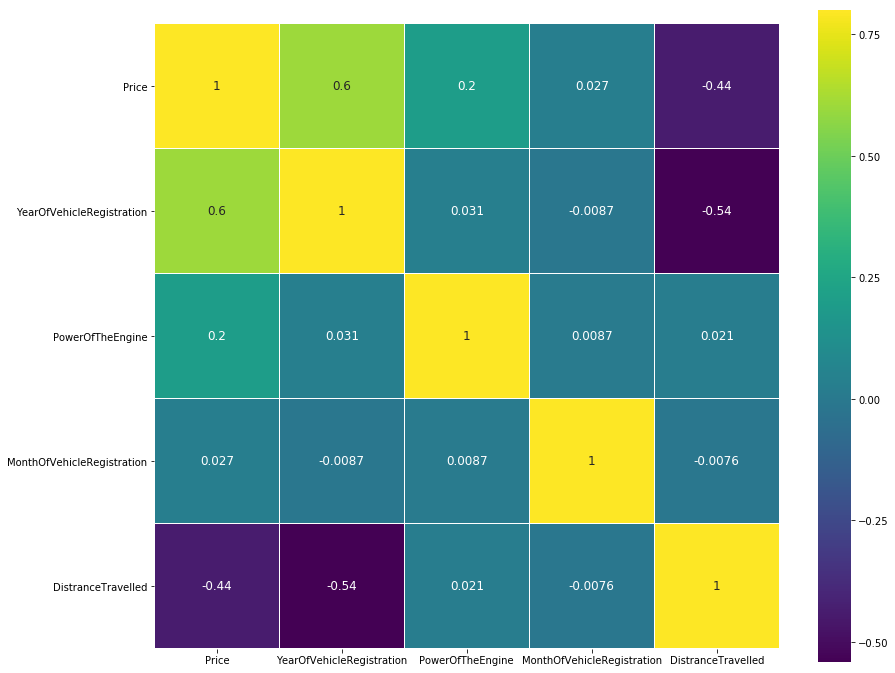

In [37]:
k= 11
cols = correlation.nlargest(k,'Price')['Price'].index
print(cols)
cm = np.corrcoef(uv_data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [38]:
uv_data.dtypes

VehicleID                     category
DataCollectedDate               object
NameOfTheVehicle                object
SellerType                      object
OfferType                       object
Price                            int64
VehicleType                     object
YearOfVehicleRegistration        int64
GearBoxType                     object
PowerOfTheEngine                 int64
ModelOfTheVehicle               object
DistranceTravelled               int64
MonthOfVehicleRegistration       int64
TypeOfTheFuelUsed               object
BrandOfTheVehicle               object
IsDamageRepaired                object
DateOfAdCreation                object
NumberOfPictures                 int64
ZipCode                       category
DateOfAdLastSeen                object
dtype: object

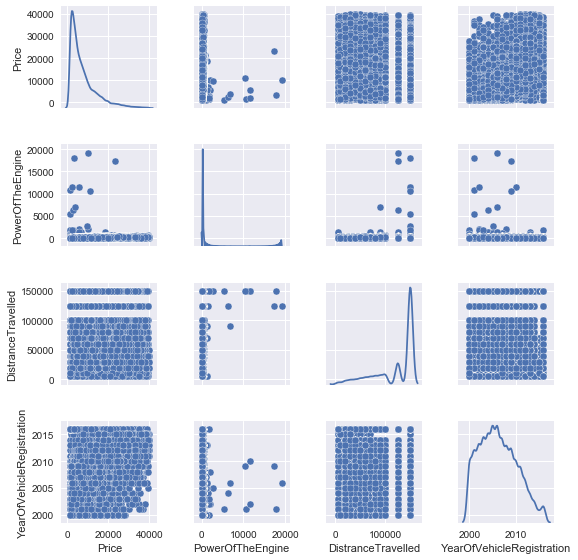

In [39]:
sns.set()
columns = ['Price','PowerOfTheEngine','DistranceTravelled','YearOfVehicleRegistration']
sns.pairplot(uv_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

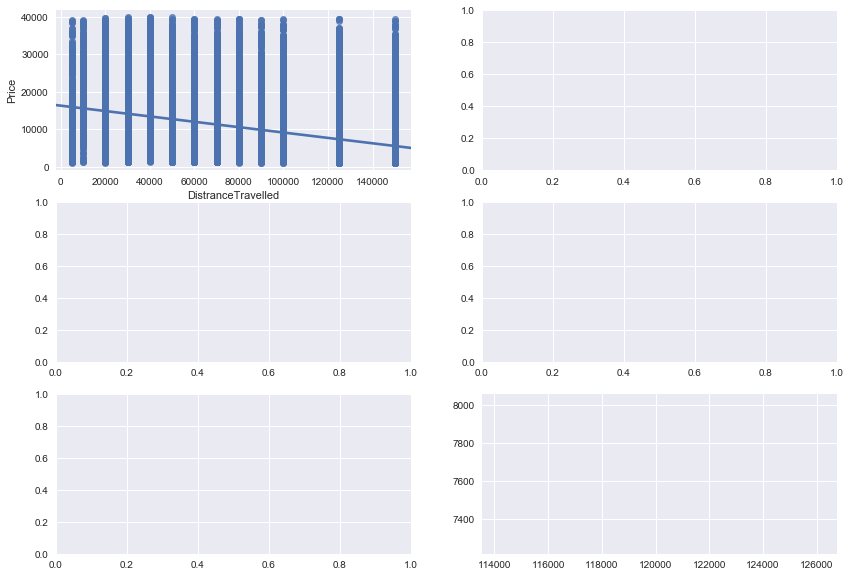

In [40]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
DistranceTravelled_scatter_plot = pd.concat([uv_data['Price'],uv_data['DistranceTravelled']],axis = 1)
sns.regplot(x='DistranceTravelled',y = 'Price',data = DistranceTravelled_scatter_plot,scatter= True, fit_reg=True, ax=ax1)



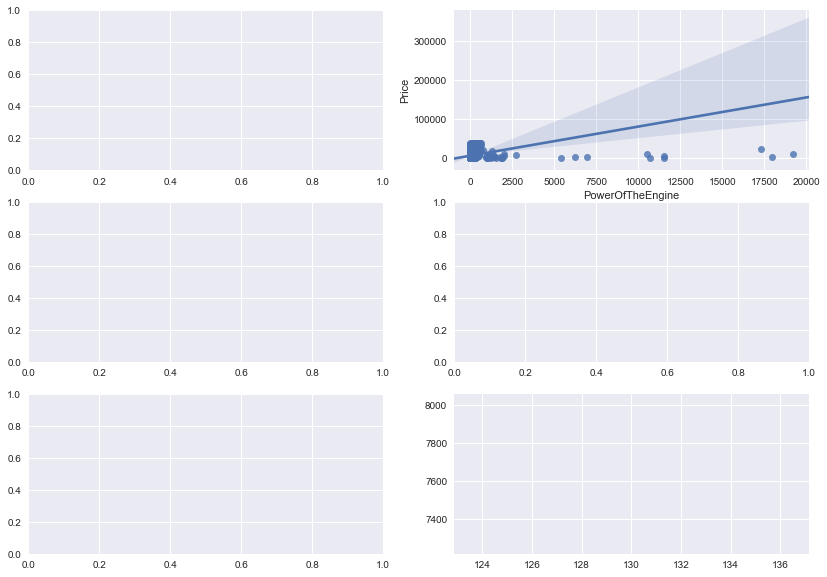

In [41]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
Power_scatter_plot = pd.concat([uv_data['Price'],uv_data['PowerOfTheEngine']],axis = 1)
sns.regplot(x='PowerOfTheEngine',y = 'Price',data = Power_scatter_plot,scatter= True, fit_reg=True, ax=ax2)



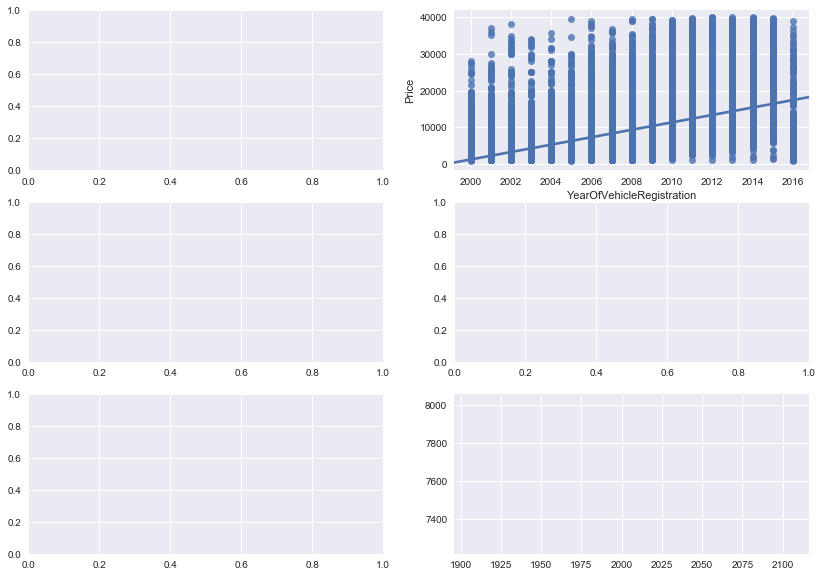

In [42]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
Year_scatter_plot = pd.concat([uv_data['Price'],uv_data['YearOfVehicleRegistration']],axis = 1)
sns.regplot(x='YearOfVehicleRegistration',y = 'Price',data = Year_scatter_plot,scatter= True, fit_reg=True, ax=ax2)


In [43]:
uv_data.describe()

,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,NumberOfPictures
count,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.0
mean,7638.980971,2006.286457,130.013473,120146.626569,6.217442,0.0
std,6710.787043,4.016998,178.318088,41188.999160,3.458960,0.0
min,1001.000000,2000.000000,1.000000,5000.000000,1.000000,0.0
25%,2850.000000,2003.000000,86.000000,90000.000000,3.000000,0.0
50%,5400.000000,2006.000000,121.000000,150000.000000,6.000000,0.0
75%,9999.000000,2009.000000,163.000000,150000.000000,9.000000,0.0
max,39800.000000,2016.000000,19211.000000,150000.000000,12.000000,0.0


## Data Cleaning

In [44]:
uv_data1 = uv_data.copy()

In [45]:
uv_data1.drop(labels=["VehicleID","DataCollectedDate","SellerType","OfferType","ModelOfTheVehicle","BrandOfTheVehicle","NumberOfPictures","MonthOfVehicleRegistration","DateOfAdCreation","ZipCode","DateOfAdLastSeen" ],axis=1,inplace=True)

In [46]:
uv_data1.head()

,NameOfTheVehicle,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,DistranceTravelled,TypeOfTheFuelUsed,IsDamageRepaired
0,Subaru_G3X_Justy_1.3,3850,Small Car,2004,manual,94,50000,petrol,No
1,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,5999,Combi,2007,manual,140,150000,diesel,No
2,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,5990,limousine,2007,automatic,150,150000,diesel,No
3,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,4000,limousine,2005,manual,150,150000,diesel,No
4,Audi_A4,12950,Combi,2005,manual,200,125000,petrol,No


In [47]:
uv_data1.dtypes


NameOfTheVehicle             object
Price                         int64
VehicleType                  object
YearOfVehicleRegistration     int64
GearBoxType                  object
PowerOfTheEngine              int64
DistranceTravelled            int64
TypeOfTheFuelUsed            object
IsDamageRepaired             object
dtype: object

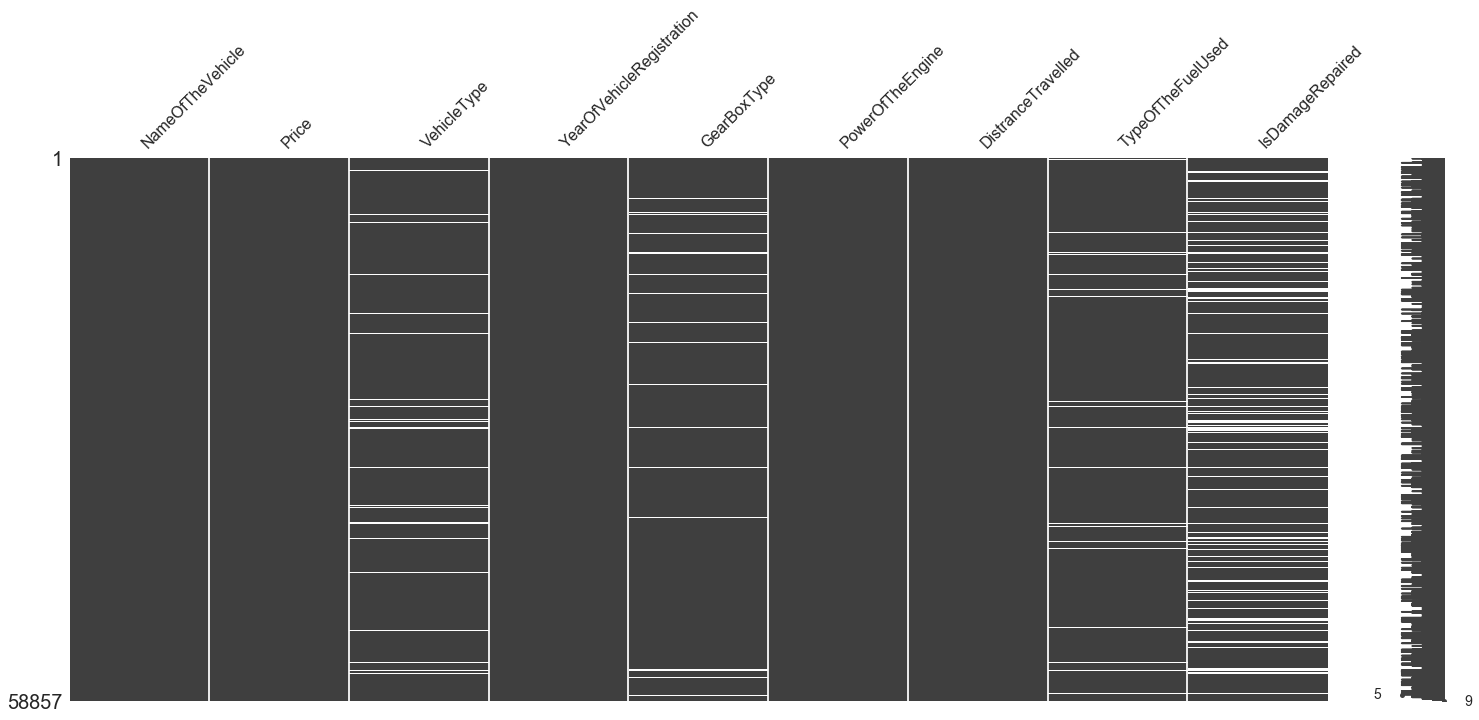

In [48]:
msno.matrix(uv_data1) ## verifying NA 

In [49]:
pd.isnull(uv_data1).sum()

NameOfTheVehicle                0
Price                           0
VehicleType                  1844
YearOfVehicleRegistration       0
GearBoxType                  1719
PowerOfTheEngine                0
DistranceTravelled              0
TypeOfTheFuelUsed            2085
IsDamageRepaired             6849
dtype: int64

In [50]:
uv_data1.dropna(axis=0,inplace=True)

In [51]:
pd.isnull(uv_data1).sum()

NameOfTheVehicle             0
Price                        0
VehicleType                  0
YearOfVehicleRegistration    0
GearBoxType                  0
PowerOfTheEngine             0
DistranceTravelled           0
TypeOfTheFuelUsed            0
IsDamageRepaired             0
dtype: int64

In [52]:
uv_data1.shape

(49320, 9)

In [53]:
rf_data = uv_data1.copy()

In [54]:
rf_data=pd.concat([rf_data,pd.get_dummies(rf_data[["VehicleType",'GearBoxType','IsDamageRepaired','TypeOfTheFuelUsed']],drop_first=True)], axis=1)

In [55]:
rf_data.drop(["VehicleType",'GearBoxType','IsDamageRepaired','TypeOfTheFuelUsed','NameOfTheVehicle'],axis=1,inplace=True)

In [56]:
rf_data.head()

,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol
0,3850,2004,94,50000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,5999,2007,140,150000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,5990,2007,150,150000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4000,2005,150,150000,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
4,12950,2005,200,125000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [57]:
rf_data[['Price','DistranceTravelled']] = np.log(rf_data[['Price','DistranceTravelled']])

In [94]:
rf_data.head()

,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol
0,8.255828,2004,94,10.819778,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,8.699348,2007,140,11.918391,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8.697847,2007,150,11.918391,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,8.294050,2005,150,11.918391,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
4,9.468851,2005,200,11.736069,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [59]:
X =rf_data.drop('Price',axis=1)
y=rf_data['Price']

In [60]:
y.head()

0    8.255828
1    8.699348
2    8.697847
3    8.294050
4    9.468851
Name: Price, dtype: float64

## Training a Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=770)

## MODEL 1

In [ ]:


from sklearn.tree import DecisionTreeRegressor

In [64]:
dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, y_train)
predicted = dtr.predict(X_test)
residual = y_test - predicted

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


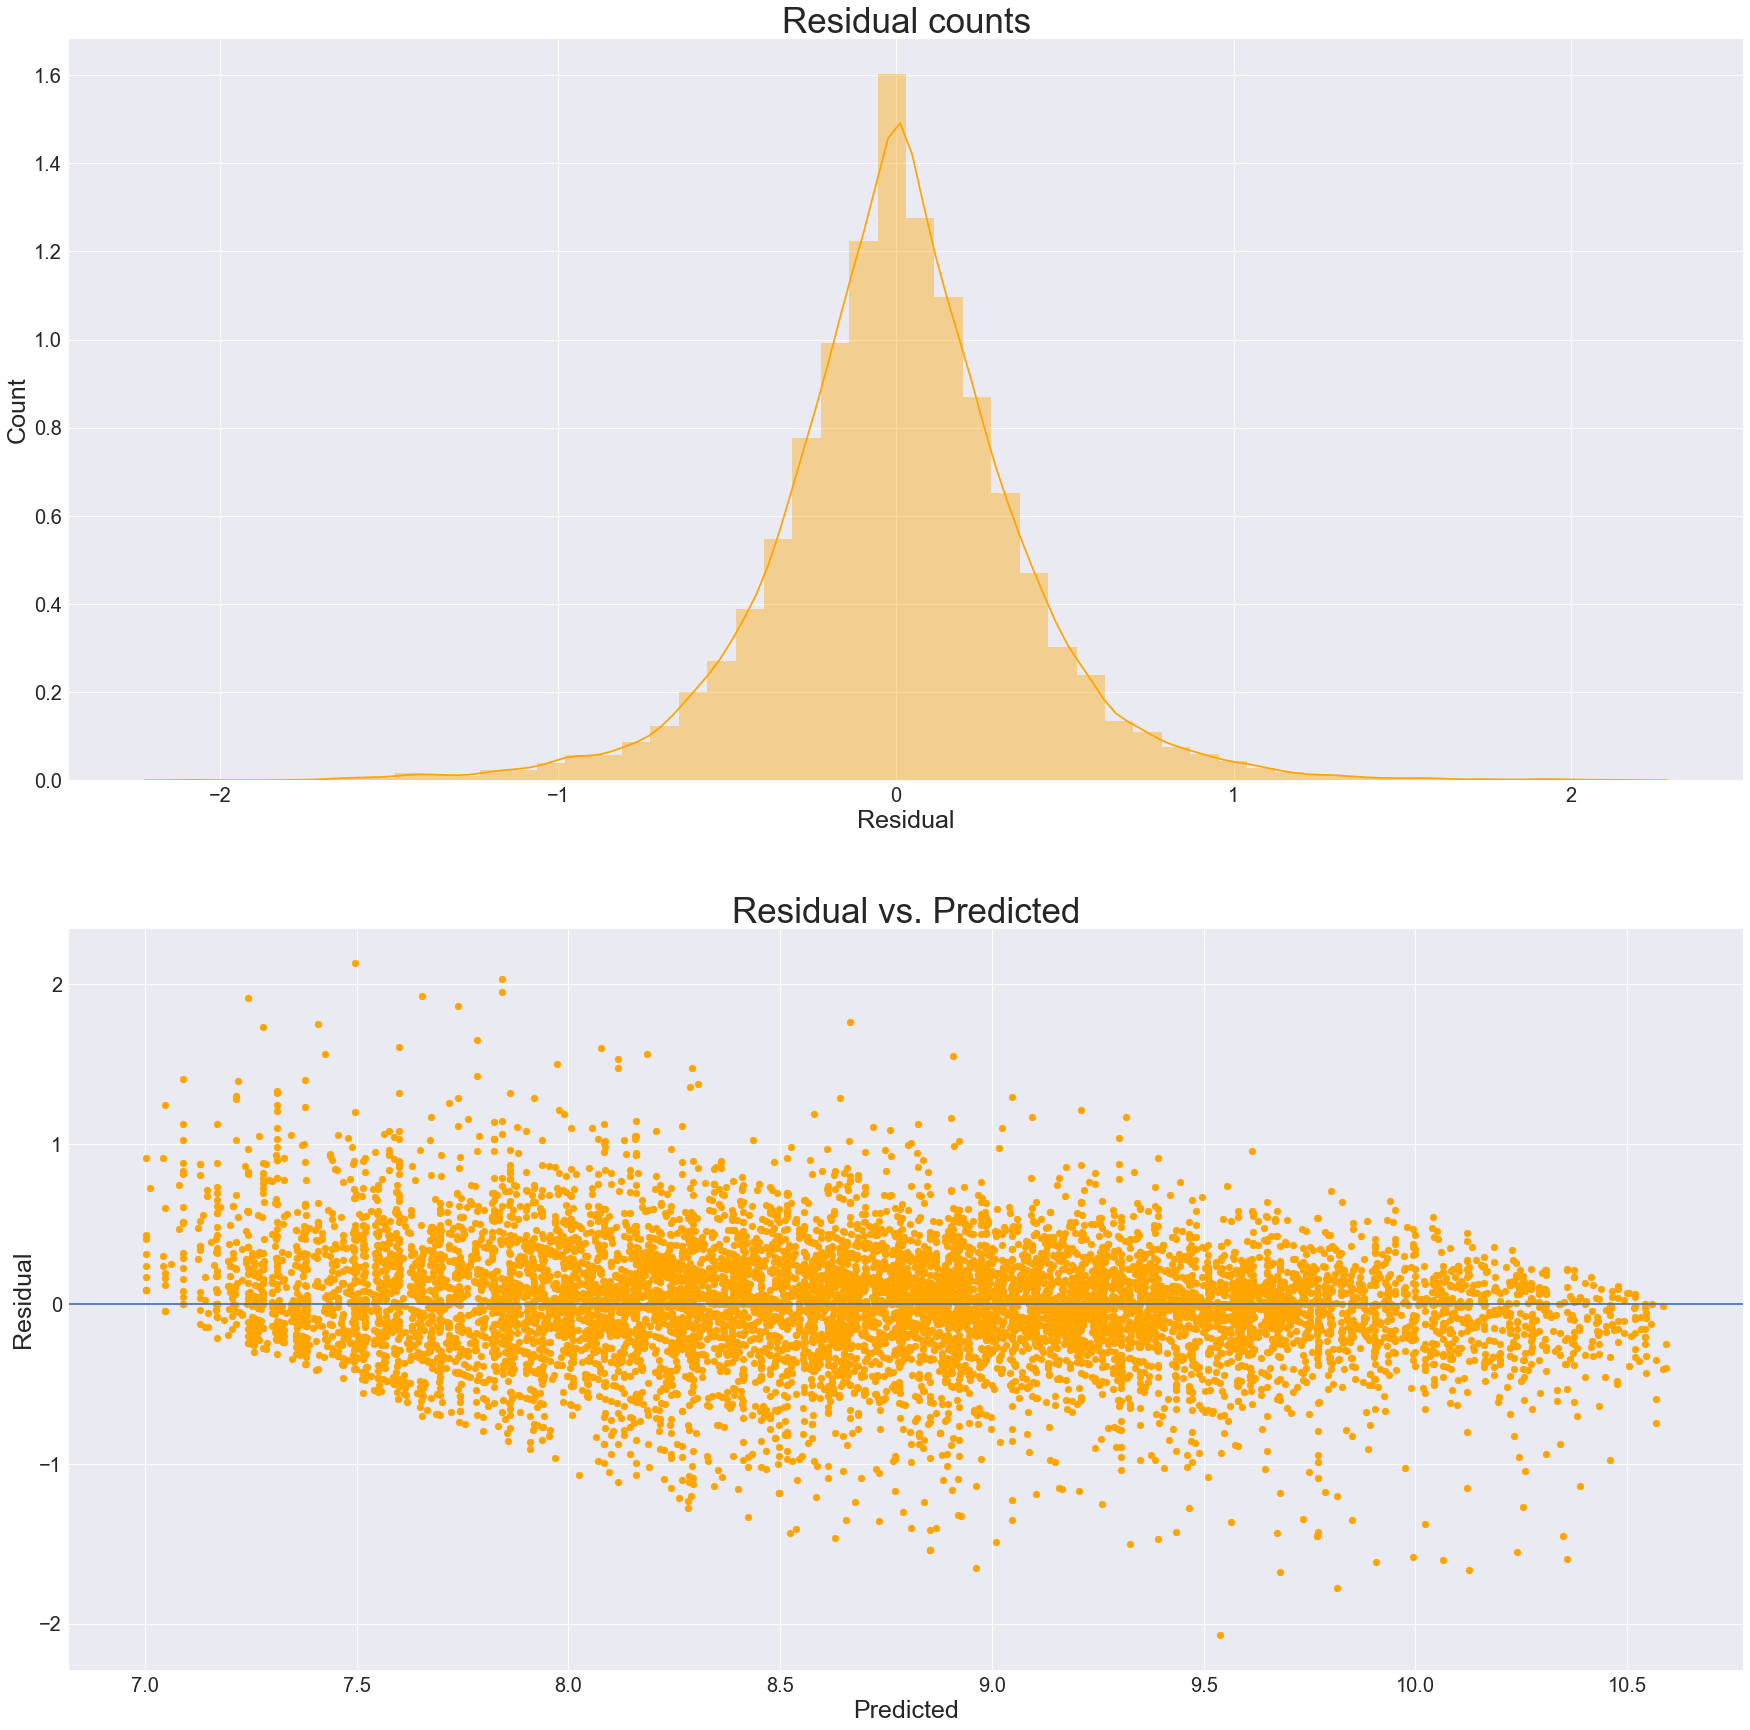

RMSE:
0.36839956864423085


In [65]:

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

## MODEL 2

In [66]:
from sklearn import linear_model

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


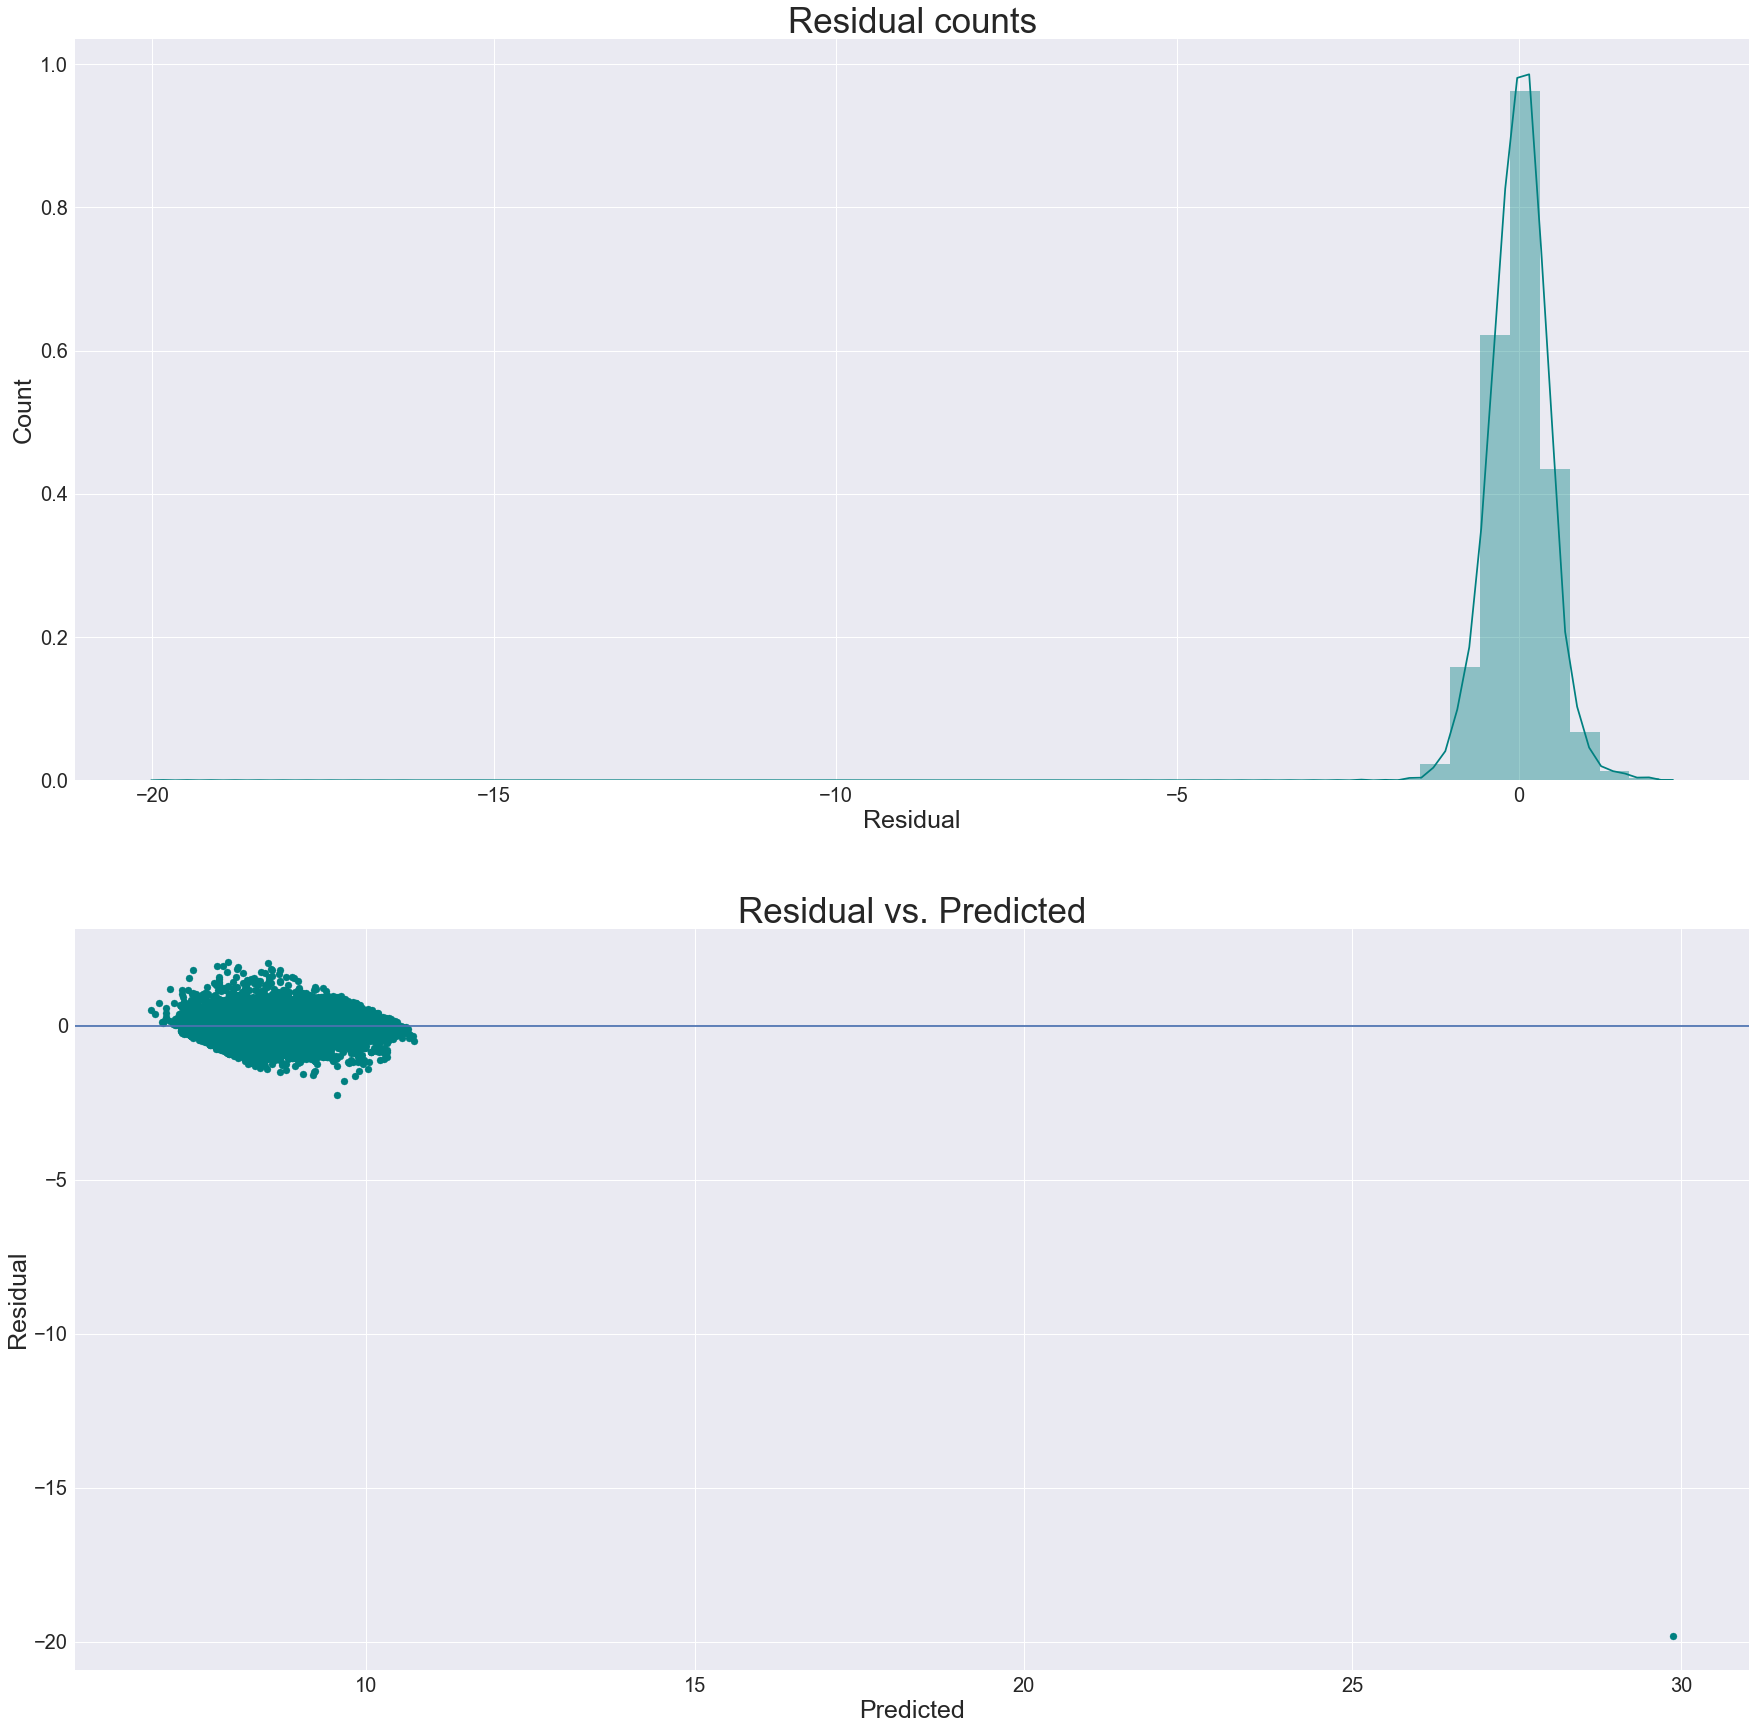

RMSE:
0.4661270614897302


In [67]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

predicted = regr.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

## MODEL 3

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


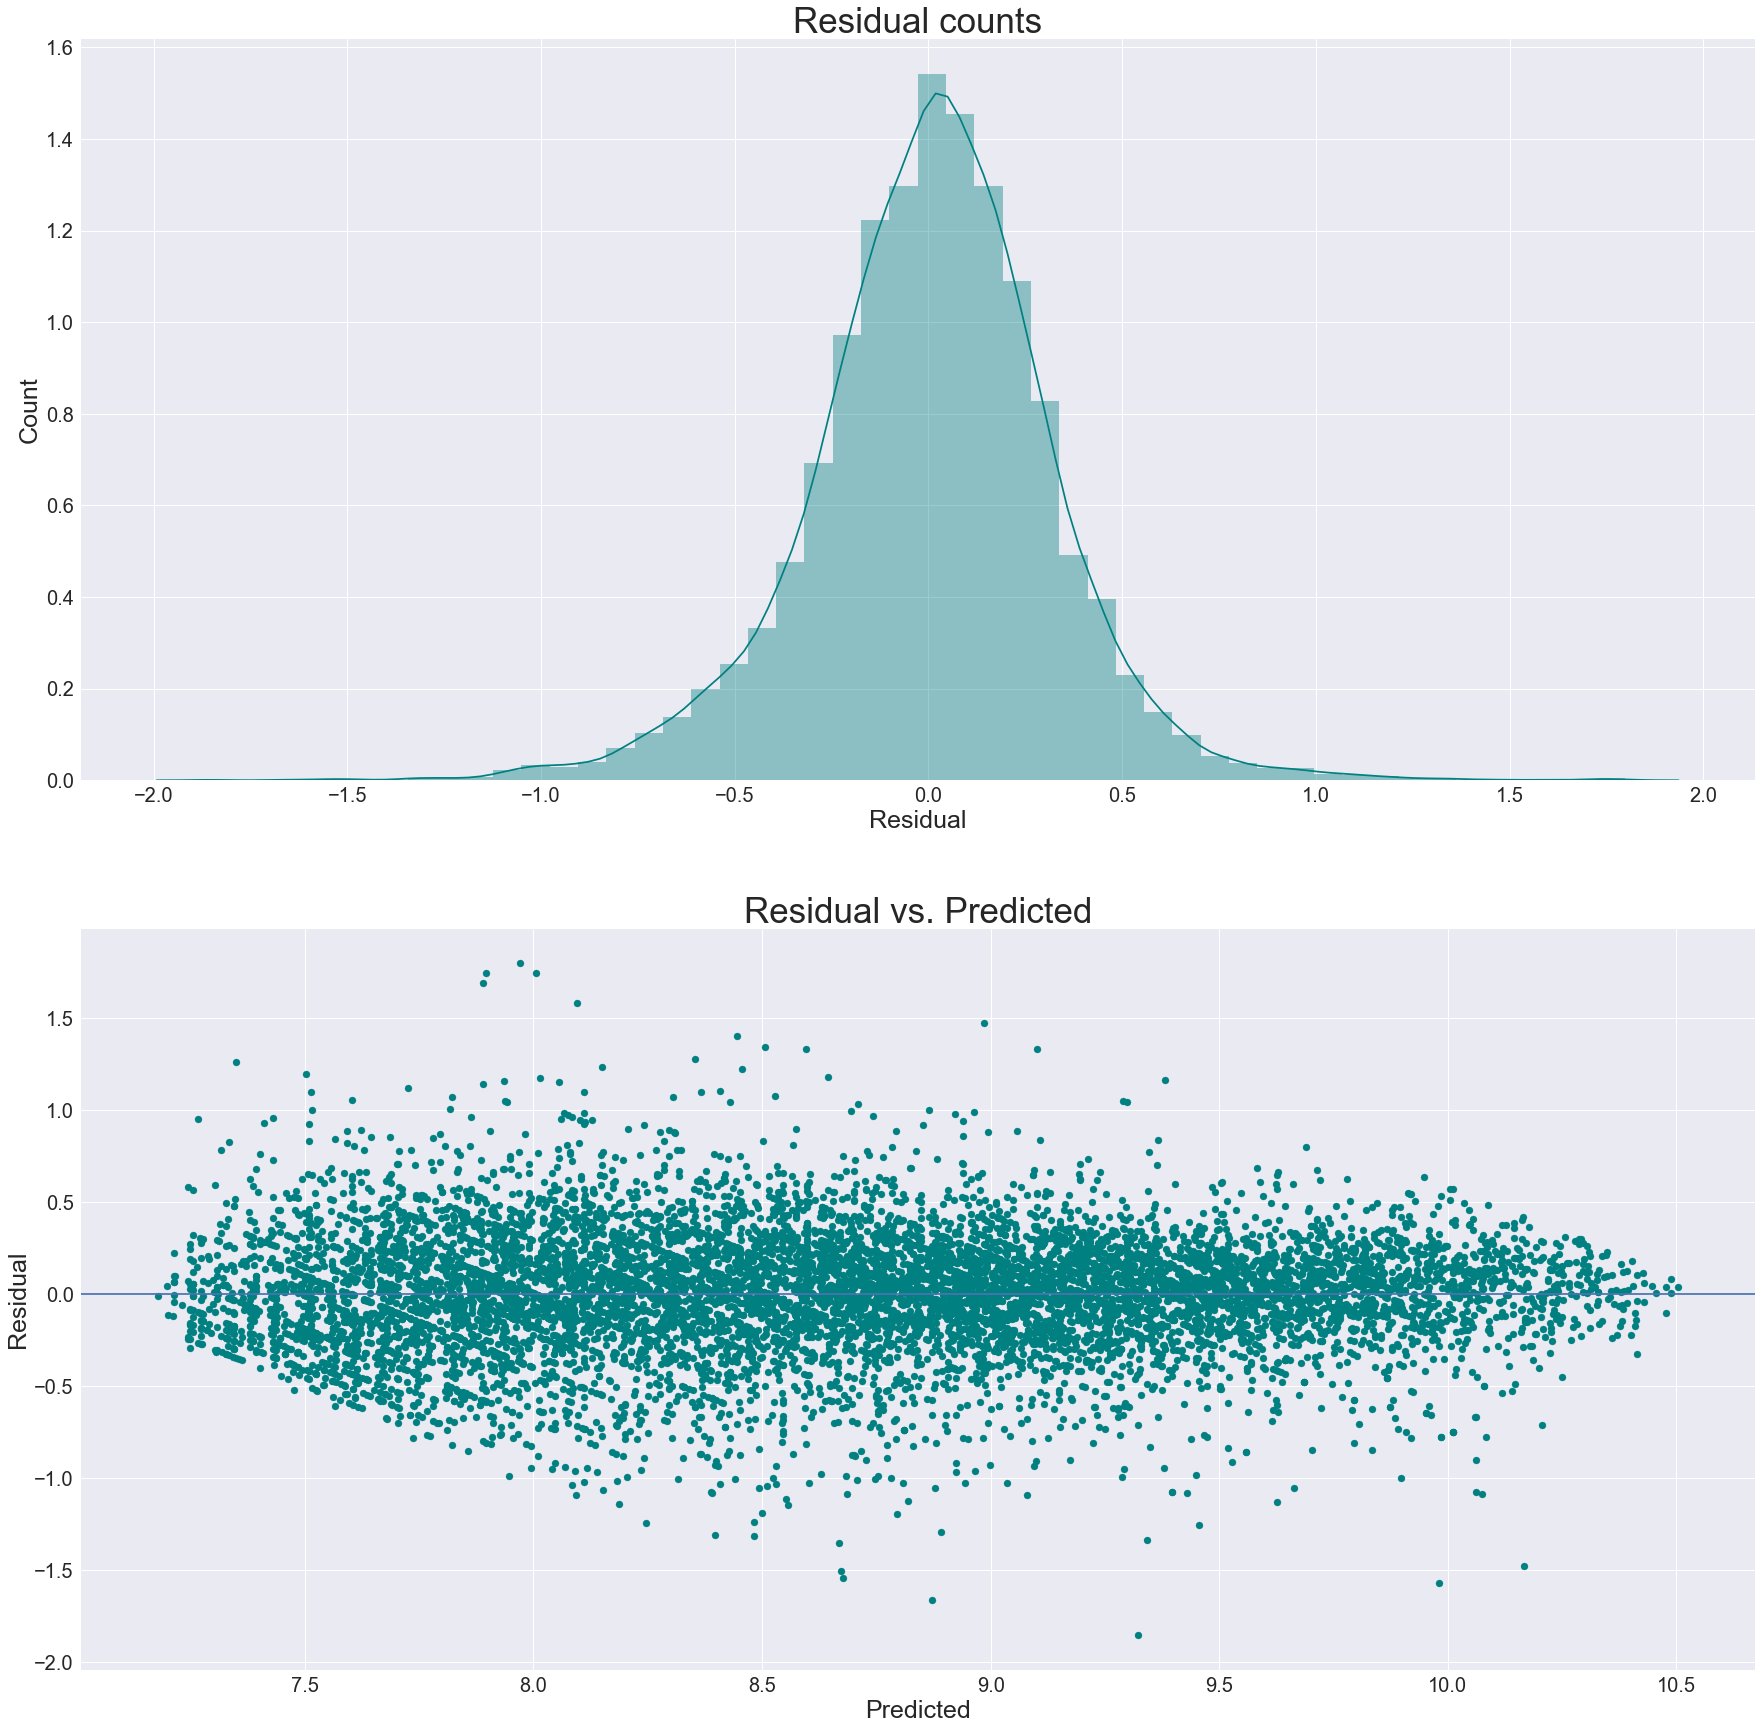


Cross Validation Scores:
[0.85199455 0.85334273 0.8514584  0.86756976 0.85515473 0.8579535
 0.85616253 0.85167108 0.85336131 0.85675426 0.84984827 0.85539656]

Mean Score:
0.8550556397828618

RMSE:
0.3150562166045797


In [69]:
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, y_train)
predicted = gbr.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predicted))
scores = cross_val_score(gbr, X, y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

## MODEL 4

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [71]:
X, y = make_regression(n_features=9, n_informative=2,random_state=0, shuffle=False)

In [72]:
rfegr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


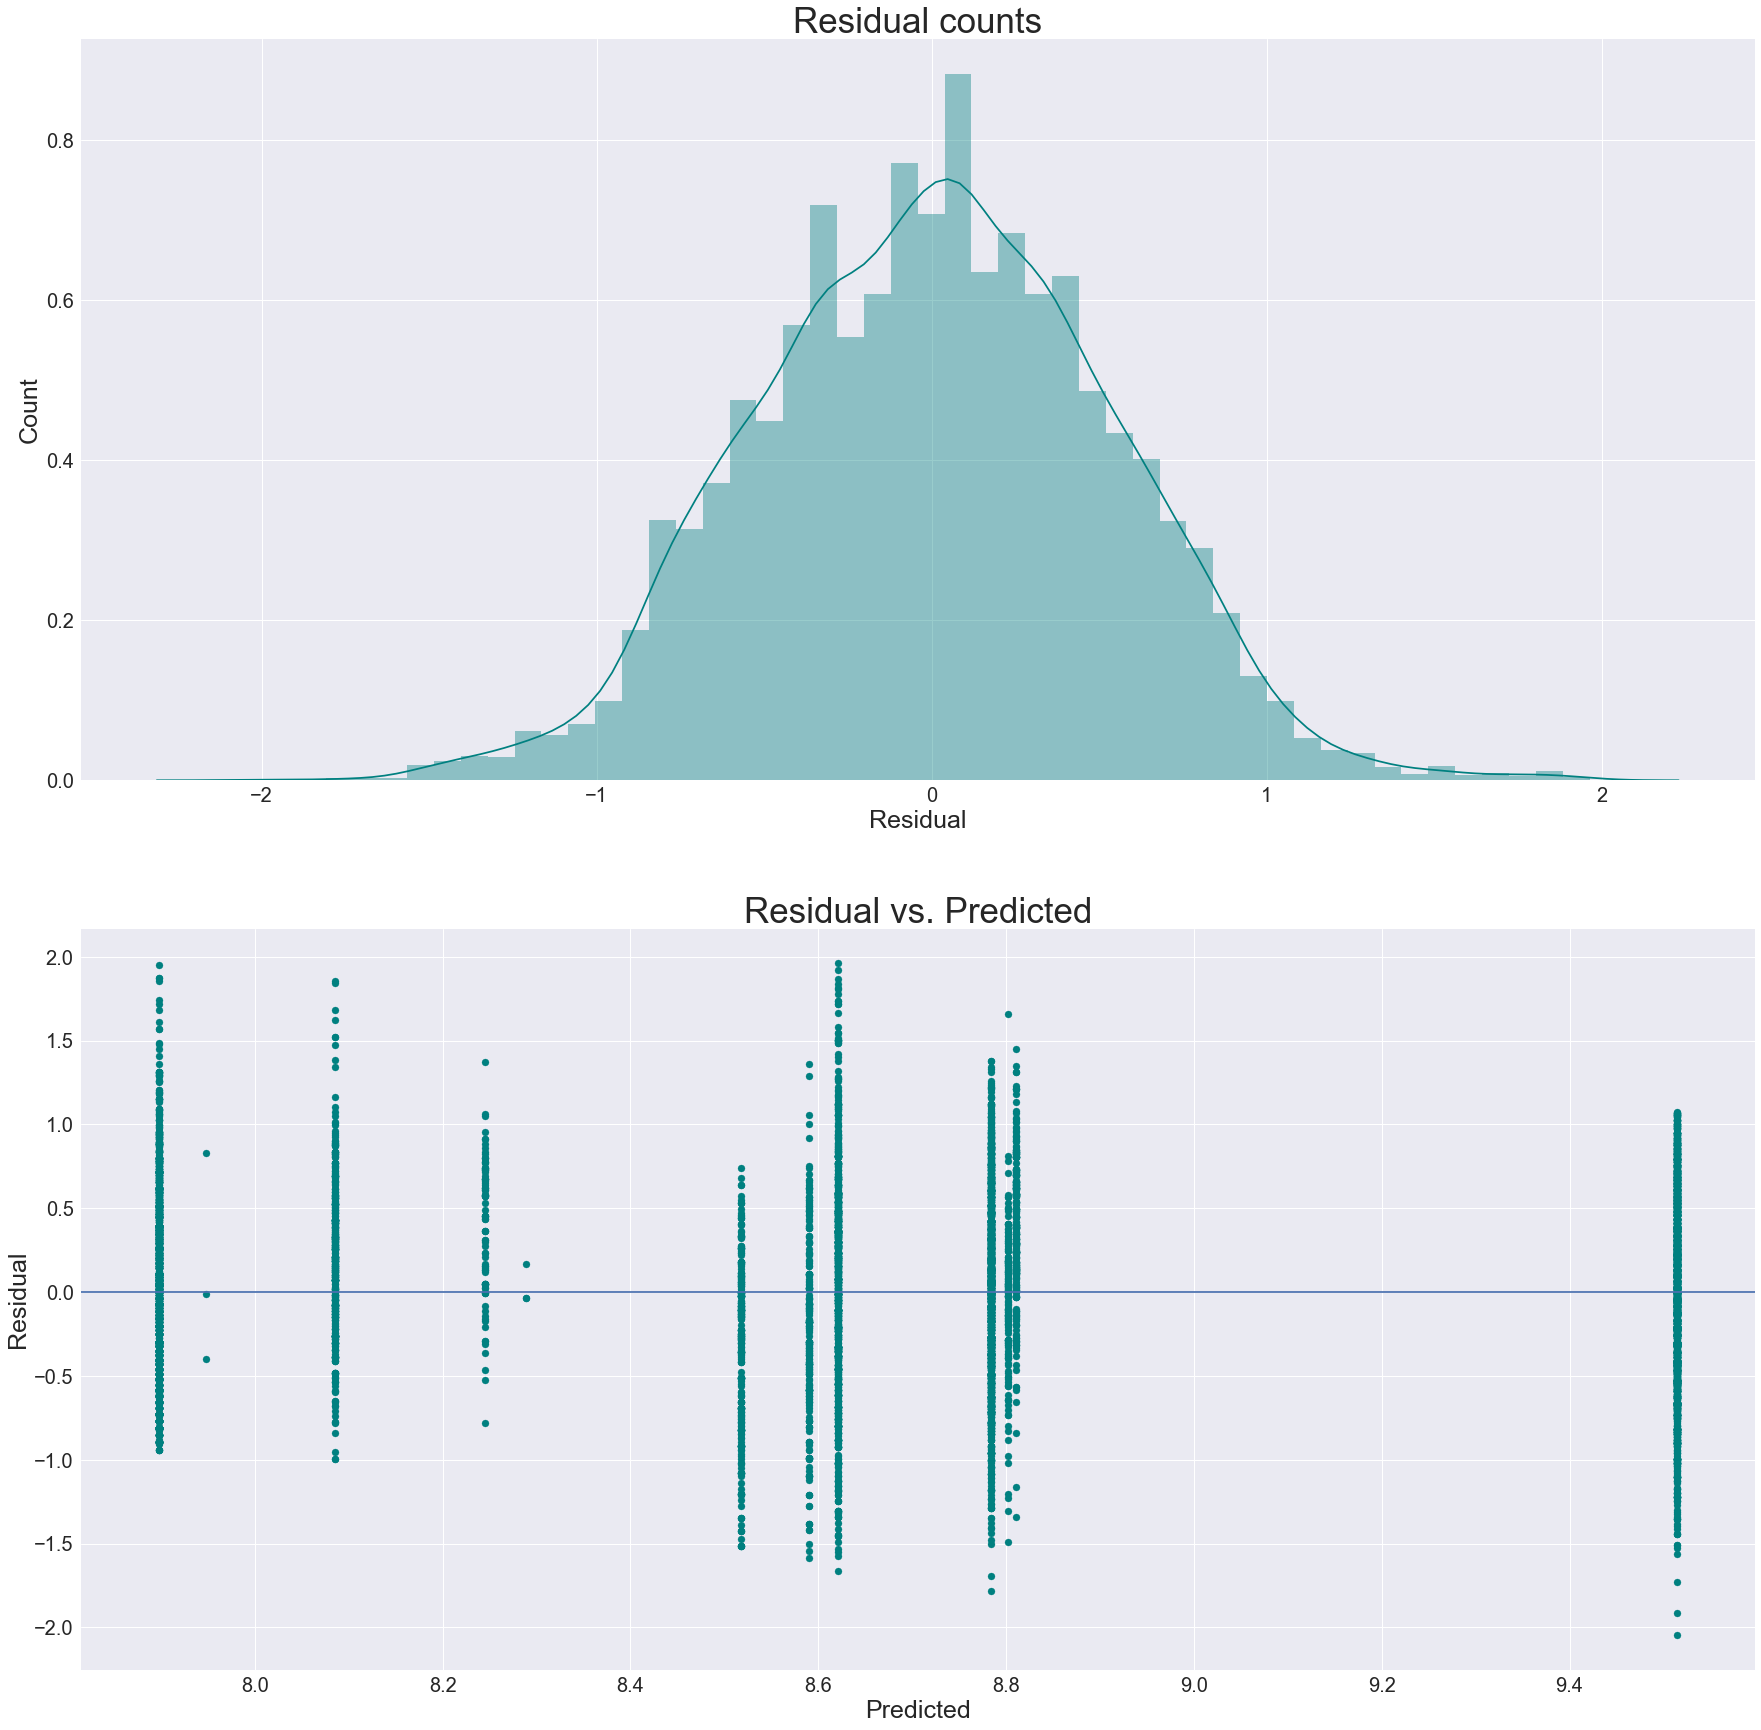


Cross Validation Scores:
[0.91781035 0.79048176 0.81666759 0.80255914 0.78547028 0.92321719
 0.87435666 0.81799124 0.91520448 0.46807462 0.81588352 0.82535772]

Mean Score:
0.8127562117209917

RMSE:
0.5264711129178763


In [78]:
rfegr.fit(X_train, y_train)
predicted = rfegr.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predicted))
scores = cross_val_score(gbr, X, y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

## MODEL 5

In [79]:
from sklearn import neighbors

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


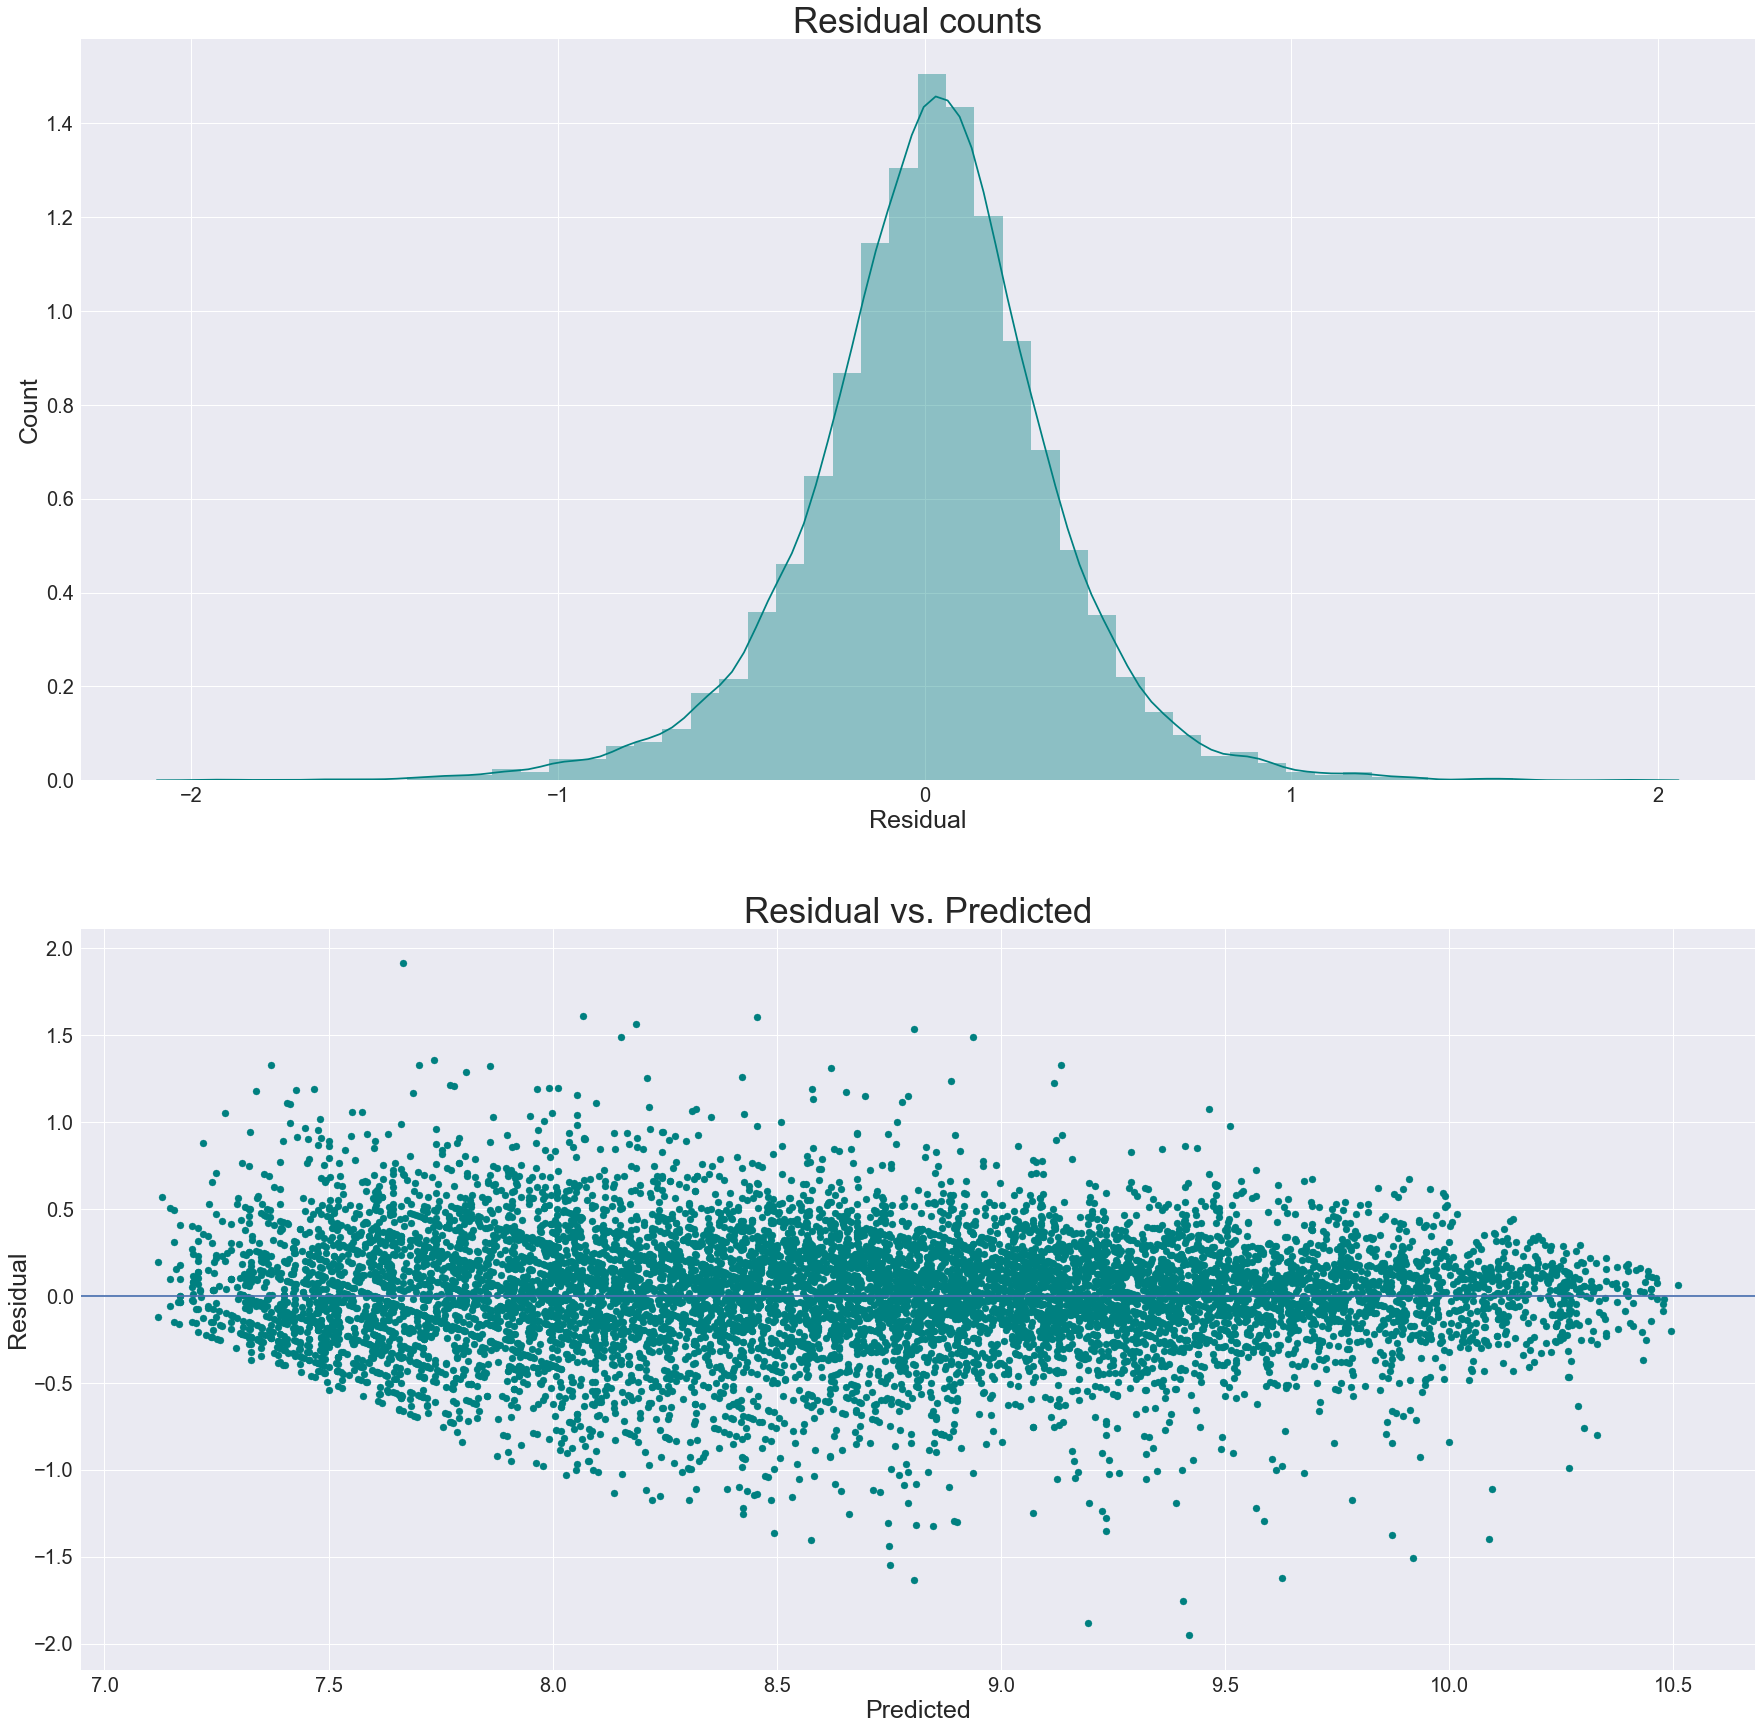

RMSE:
0.3371148602045616


In [80]:
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

predicted = knn.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

## Predictions on the Unseen Data

In [216]:
uv_data_test = pd.read_csv("TestData.csv")

In [217]:
## Preprocessing on the Unseen Data
uv_data_test.head()

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
0,60001,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
1,60002,21-03-2016 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000,2,NaN,volkswagen,No,21-03-2016 00:00,0,90762,23-03-2016 02:50
2,60003,21-03-2016 12:57,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,suv,2011,manual,190,navara,70000,3,diesel,nissan,No,21-03-2016 00:00,0,4177,06-04-2016 07:45
3,60004,23-03-2016 15:48,Ford_C_MAX_2.0_TDCi_DPF_Titanium,private,offer,bus,2007,manual,136,c_max,150000,6,diesel,ford,No,23-03-2016 00:00,0,88361,05-04-2016 18:45
4,60005,18-03-2016 21:44,BMW_530d_touring_Vollausstattung_NAVI,private,offer,Combi,2002,automatic,193,5er,150000,9,diesel,bmw,Yes,18-03-2016 00:00,0,73765,18-03-2016 21:44


In [218]:
pd.isnull(uv_data_test).sum()

VehicleID                        0
DataCollectedDate                0
NameOfTheVehicle                 0
SellerType                       0
OfferType                        0
VehicleType                    636
YearOfVehicleRegistration        0
GearBoxType                    504
PowerOfTheEngine                 0
ModelOfTheVehicle                0
DistranceTravelled               0
MonthOfVehicleRegistration       0
TypeOfTheFuelUsed              754
BrandOfTheVehicle                0
IsDamageRepaired              2245
DateOfAdCreation                 0
NumberOfPictures                 0
ZipCode                          0
DateOfAdLastSeen                 0
dtype: int64

In [219]:
uv_data_test = uv_data_test.fillna(uv_data_test.mode().iloc[0])

In [220]:
pd.isnull(uv_data_test).sum()

VehicleID                     0
DataCollectedDate             0
NameOfTheVehicle              0
SellerType                    0
OfferType                     0
VehicleType                   0
YearOfVehicleRegistration     0
GearBoxType                   0
PowerOfTheEngine              0
ModelOfTheVehicle             0
DistranceTravelled            0
MonthOfVehicleRegistration    0
TypeOfTheFuelUsed             0
BrandOfTheVehicle             0
IsDamageRepaired              0
DateOfAdCreation              0
NumberOfPictures              0
ZipCode                       0
DateOfAdLastSeen              0
dtype: int64

In [221]:
uv_data_test.drop(labels=["VehicleID","DataCollectedDate","SellerType","OfferType","ModelOfTheVehicle","BrandOfTheVehicle","NumberOfPictures","MonthOfVehicleRegistration","DateOfAdCreation","ZipCode","DateOfAdLastSeen" ],axis=1,inplace=True)

In [222]:
uv_data_test=pd.concat([uv_data_test,pd.get_dummies(uv_data_test[["VehicleType",'GearBoxType','IsDamageRepaired','TypeOfTheFuelUsed']],drop_first=True)], axis=1)

In [223]:
uv_data_test.drop(["VehicleType",'GearBoxType','IsDamageRepaired','TypeOfTheFuelUsed','NameOfTheVehicle'],axis=1,inplace=True)

In [224]:
uv_data_test.head()

,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol
0,2004,163,125000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2004,131,150000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2011,190,70000,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,2007,136,150000,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4,2002,193,150000,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [225]:
uv_data_test.shape

(19594, 18)

In [226]:
uv_data_test[['DistranceTravelled']] = np.log(uv_data_test[['DistranceTravelled']])

In [227]:
uv_data_test.head()

,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol
0,2004,163,11.736069,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2004,131,11.918391,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2011,190,11.156251,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,2007,136,11.918391,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4,2002,193,11.918391,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [228]:
uv_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19594 entries, 0 to 19593
Data columns (total 18 columns):
YearOfVehicleRegistration    19594 non-null int64
PowerOfTheEngine             19594 non-null int64
DistranceTravelled           19594 non-null float64
VehicleType_Other            19594 non-null uint8
VehicleType_Small Car        19594 non-null uint8
VehicleType_bus              19594 non-null uint8
VehicleType_cabrio           19594 non-null uint8
VehicleType_coupe            19594 non-null uint8
VehicleType_limousine        19594 non-null uint8
VehicleType_suv              19594 non-null uint8
GearBoxType_manual           19594 non-null uint8
IsDamageRepaired_Yes         19594 non-null uint8
TypeOfTheFuelUsed_diesel     19594 non-null uint8
TypeOfTheFuelUsed_electro    19594 non-null uint8
TypeOfTheFuelUsed_hybrid     19594 non-null uint8
TypeOfTheFuelUsed_lpg        19594 non-null uint8
TypeOfTheFuelUsed_other      19594 non-null uint8
TypeOfTheFuelUsed_petrol     19594 non-

## Price Prediction

In [229]:
## Prediction using Gradient Boost Model

price_prediction = np.exp(gbr.predict(uv_data_test))

In [230]:
price_prediction[0]

8824.665716320023

In [231]:
## Prediction using KNN

price_prediction = np.exp(knn.predict(uv_data_test))

In [232]:
price_prediction[0]

7024.109015540956

In [233]:
sample_submission = pd.read_csv("samplesubmission-1548926597414.csv")

In [234]:
sample_submission.Price = price_prediction

In [235]:
sample_submission.to_csv("Submission.csv")